In [17]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
airlines= pd.read_excel("AirlinesData.xlsx")

In [3]:
airlines

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [13]:
airlines["Month"] = pd.to_datetime(airlines.Month,format="%b-%y")

0    1995-01-01
1    1995-02-01
2    1995-03-01
3    1995-04-01
4    1995-05-01
        ...    
91   2002-08-01
92   2002-09-01
93   2002-10-01
94   2002-11-01
95   2002-12-01
Name: Month, Length: 96, dtype: datetime64[ns]

In [20]:
airlines["month"] = airlines.Month.dt.strftime("%b") # month extraction
airlines["year"] = airlines.Month.dt.strftime("%Y") # year extraction
airlines["month"]
airlines["year"]

0     1995
1     1995
2     1995
3     1995
4     1995
      ... 
91    2002
92    2002
93    2002
94    2002
95    2002
Name: year, Length: 96, dtype: object

<AxesSubplot:xlabel='month', ylabel='year'>

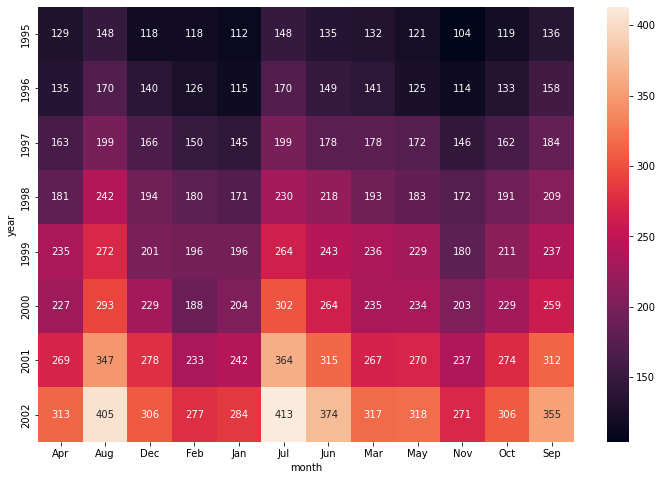

In [21]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=airlines,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

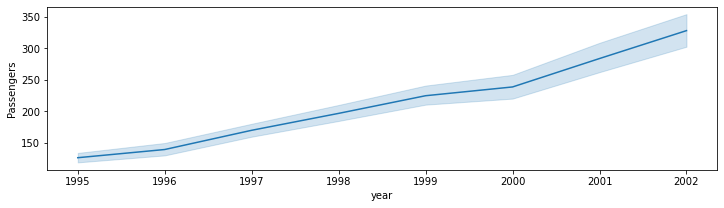

In [36]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=airlines)

<AxesSubplot:xlabel='month', ylabel='Passengers'>

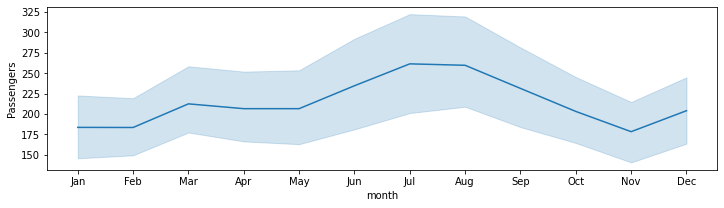

In [23]:
plt.figure(figsize=(12,3))
sns.lineplot(x="month",y="Passengers",data=airlines)

C:\Users\Acer\AppData\Local\Temp/ipykernel_5468/4068021664.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12)


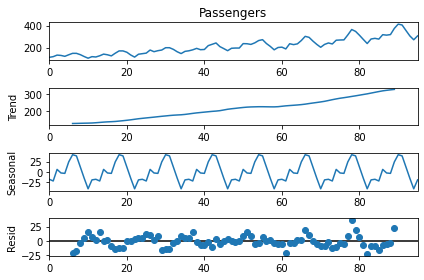

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(airlines.Passengers,freq=12)
decompose_ts_add.plot()
plt.show() 

In [49]:
train = airlines.head(88)
test = airlines.tail(8)  

In [37]:
airlines["month"][0]

'Jan'

In [47]:
dummy=pd.DataFrame(pd.get_dummies(airlines["month"]))
dummy

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
data = pd.concat((airlines,dummy),axis=1)
data

,Month,Passengers,month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,1995,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,1995,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,1995,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1995,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,1995,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,2002,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,2002,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,2002,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
t= np.arange(1,97)
data['t']=t
data['t_square']=data['t']*data['t']
data['t']
data['Passengers']

0     112
1     118
2     132
3     129
4     121
     ... 
91    405
92    355
93    306
94    271
95    306
Name: Passengers, Length: 96, dtype: int64

In [75]:
log_Pas=np.log(data['Passengers'])
data['log_Pas']=log_Pas

In [76]:
train = data.head(88)
test = data.tail(8)

In [77]:
import statsmodels.formula.api as smf

In [78]:
#linear model
linear= smf.ols('Passengers~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Passengers'])-np.array(predlin))**2))
rmselin

37.81717797893694

In [79]:
#quadratic model
quad=smf.ols('Passengers~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predquad))**2))
rmsequad

58.30476227446929

In [80]:
expo=smf.ols('log_Pas~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
print(predexp)
rmseexpo=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predexp)))**2))
rmseexpo

88    5.750954
89    5.761941
90    5.772928
91    5.783915
92    5.794901
93    5.805888
94    5.816875
95    5.827862
dtype: float64


55.51430684778256

In [81]:
#additive seasonality
additive= smf.ols('Passengers~ Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']])))
print(predadd)
rmseadd=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predadd))**2))
rmseadd

88    190.000000
89    214.571429
90    239.571429
91    238.714286
92    213.571429
93    188.428571
94    165.142857
95    190.000000
dtype: float64


140.54211729831692

In [82]:
#additive seasonality with linear trend
addlinear= smf.ols('Passengers~t+Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']])))
print(predaddlinear)

rmseaddlinear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddlinear))**2))
rmseaddlinear

88    287.347557
89    319.575535
90    344.575535
91    343.718392
92    318.575535
93    293.432678
94    270.146964
95    302.660656
dtype: float64


41.58649974481049

In [84]:
#additive seasonality with quadratic trend
addquad=smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(predaddquad))**2))
rmseaddquad

32.60164244277345

In [85]:
#multiplicative seasonality
mulsea=smf.ols('log_Pas~Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmsemul= np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmul)))**2))
rmsemul

148.4573151856177

In [86]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Pas~t+Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(predmullin)))**2))
rmsemulin

15.292125158793116

In [87]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Pas~t+t_square+Jan+Feb+Mar+Apr+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Jan','Feb','Mar','Apr','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad


22.152701433906852

In [88]:
dataM={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
dataM

{'Model': 0    rmse_mul_quad
 1          rmseadd
 2    rmseaddlinear
 3      rmseaddquad
 4         rmseexpo
 5          rmselin
 6          rmsemul
 7        rmsemulin
 8         rmsequad
 dtype: object,
 'Values': 0     22.152701
 1    140.542117
 2     41.586500
 3     32.601642
 4     55.514307
 5     37.817178
 6    148.457315
 7     15.292125
 8     58.304762
 dtype: float64}

In [89]:
Rmse=pd.DataFrame(dataM)
Rmse

,Model,Values
0,rmse_mul_quad,22.152701
1,rmseadd,140.542117
2,rmseaddlinear,41.586500
3,rmseaddquad,32.601642
4,rmseexpo,55.514307
5,rmselin,37.817178
6,rmsemul,148.457315
7,rmsemulin,15.292125
8,rmsequad,58.304762


##### multiplicative seasonality with linear trend has the least rmse value so we will use this model for forecasting.